In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import h5py

In [2]:
data = pd.read_csv('./Resources/predictor.csv')
data.head()

,Unnamed: 0,Store,Product,Month,Day,Week of Year,Is_Holiday,Regular Price,Promotion Price,Production Cost,Weekly_Units_Sold
0,0,1,1,2,5,5,False,9.99,7.99,2.5,245
1,1,1,1,2,12,6,True,9.99,7.99,2.5,453
2,2,1,1,2,19,7,False,9.99,7.99,2.5,409
3,3,1,1,2,26,8,False,9.99,7.99,2.5,191
4,4,1,1,3,5,9,False,9.99,9.99,2.5,145


In [3]:
data = data.drop(columns=['Unnamed: 0'])

In [4]:
data.head()

,Store,Product,Month,Day,Week of Year,Is_Holiday,Regular Price,Promotion Price,Production Cost,Weekly_Units_Sold
0,1,1,2,5,5,False,9.99,7.99,2.5,245
1,1,1,2,12,6,True,9.99,7.99,2.5,453
2,1,1,2,19,7,False,9.99,7.99,2.5,409
3,1,1,2,26,8,False,9.99,7.99,2.5,191
4,1,1,3,5,9,False,9.99,9.99,2.5,145


In [5]:
data.dtypes

Store                  int64
Product                int64
Month                  int64
Day                    int64
Week of Year           int64
Is_Holiday              bool
Regular Price        float64
Promotion Price      float64
Production Cost      float64
Weekly_Units_Sold      int64
dtype: object

In [6]:
X = data.iloc[:,4].values.reshape(-1,1)
Y = data.iloc[:,9].values.reshape(-1,1)
lr= LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

<function matplotlib.pyplot.show(close=None, block=None)>

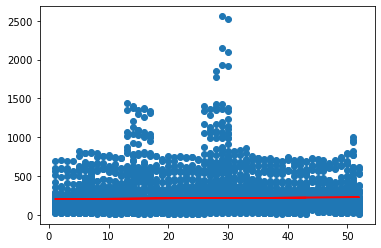

In [7]:
plt.scatter(X,Y)
plt.plot(X,Y_pred, color='red')
plt.show

In [20]:
new_data = pd.get_dummies(data, columns=['Is_Holiday'])

In [30]:
clean_data= new_data.drop(columns=['Is_Holiday_False'])
clean_data.head()

,Store,Product,Month,Day,Week of Year,Regular Price,Promotion Price,Production Cost,Weekly_Units_Sold,Is_Holiday_True
0,1,1,2,5,5,9.99,7.99,2.5,245,0
1,1,1,2,12,6,9.99,7.99,2.5,453,1
2,1,1,2,19,7,9.99,7.99,2.5,409,0
3,1,1,2,26,8,9.99,7.99,2.5,191,0
4,1,1,3,5,9,9.99,9.99,2.5,145,0


In [27]:
X = clean_data.iloc[:,8].values.reshape(-1,1)
Y = clean_data.iloc[:,9].values.reshape(-1,1)
lr= LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

<function matplotlib.pyplot.show(close=None, block=None)>

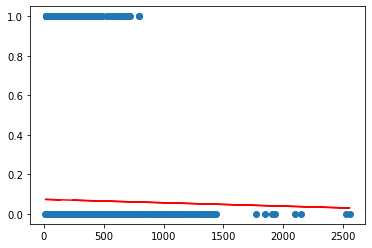

In [34]:
plt.scatter(X,Y)
plt.plot(X,Y_pred, color='red')
plt.show

In [31]:
data.loc[data['Weekly_Units_Sold'] > 1000]

,Store,Product,Month,Day,Week of Year,Is_Holiday,Regular Price,Promotion Price,Production Cost,Weekly_Units_Sold
1438,4,2,4,2,13,False,5.99,4.01,1.5,1020
1440,4,2,4,16,15,False,5.99,4.01,1.5,1029
1441,4,2,4,23,16,False,5.99,4.01,1.5,1005
1442,4,2,4,30,17,False,5.99,4.01,1.5,1005
1451,4,2,7,2,26,False,5.99,4.01,1.5,1055
...,...,...,...,...,...,...,...,...,...,...
3794,10,3,7,22,29,False,21.99,11.00,5.5,1931
3795,10,3,7,29,30,False,21.99,11.00,5.5,1911
3845,10,3,7,13,28,False,19.99,10.00,5.0,1777
3846,10,3,7,20,29,False,19.99,10.00,5.0,2557
